### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [56]:
# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [57]:
# Creating a dataframe using pandas
data = pd.read_csv('data/coupons.csv')

In [58]:
# Analyzing the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [59]:
#Analyzed the dataframe by viewing the top 5 rows
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [60]:
# Used isnull function to get the null values and sum function to get the count of rows for null values. 
null_counts = data.isnull().sum()
# Then filtered the data to greater than 0 to only get the columns with null values.
columns_with_null = null_counts[null_counts > 0]
print(columns_with_null)

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


In [61]:
# Analyzed the columns with null values to see the data present in them by using value_counts function.
value_counts = data['car'].value_counts()
print(value_counts)

Mazda5                                      22
Scooter and motorcycle                      22
do not drive                                22
Car that is too old to install Onstar :D    21
crossover                                   21
Name: car, dtype: int64


In [62]:
#Analyzed the data in the columns
value_counts = data['Bar'].value_counts()
print(value_counts)

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64


In [63]:
#Analyzed the data in the columns
value_counts = data['CoffeeHouse'].value_counts()
print(value_counts)

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64


In [64]:
#Analyzed the data in the columns
value_counts = data['CarryAway'].value_counts()
print(value_counts)

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64


In [65]:
#Analyzed the data in the columns
value_counts = data['RestaurantLessThan20'].value_counts()
print(value_counts)

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64


In [66]:
#Analyzed the data in the columns
value_counts = data['Restaurant20To50'].value_counts()
print(value_counts)

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [67]:
# Dropped 'car' column as it only has 108 observations among 12684 rows of data
data = data.drop('car', axis=1)
print(data)

           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  .

In [68]:
# Replaced all the remaining null values with 0
null_columns = data.columns[data.isnull().any()]

data[null_columns] = data[null_columns].fillna(0)

print(data)

           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  .

4. What proportion of the total observations chose to accept the coupon? 



In [69]:
# Used value_counts method to get the counts and normalized the data to get percentages
value_counts = data['Y'].value_counts(normalize=True) * 100
# Printed the percentage of observations who chose to accept coupon
percentage_of_coupon_accepted = value_counts[1]
print(percentage_of_coupon_accepted)

56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

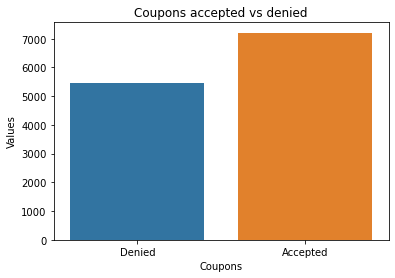

In [70]:
# Used Seaborn library to get bar plot for Coupon accepted vs denied
bar = sns.barplot(data = data.filter(['Y']).value_counts().reset_index(name='count'), x = "Y", y = "count")
# Add title to bar graph
plt.title('Coupons accepted vs denied')

# x-axis label
plt.xlabel('Coupons')

# y-axis label
plt.ylabel('Values')

# Replace bar labels
bar.set_xticklabels(['Denied', 'Accepted'])

plt.show()

6. Use a histogram to visualize the temperature column.

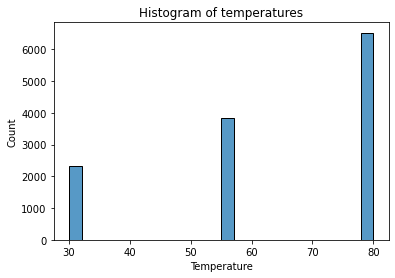

In [71]:
# Used Seaborn library to plot a histogram to vizualize temperature
hist = sns.histplot(data["temperature"])

# Add title to bar graph
plt.title('Histogram of temperatures')

# x-axis label
plt.xlabel('Temperature')

# y-axis label
plt.ylabel('Count')

plt.show()

7. Bar plot to show acceptance rate of different coupons

In [72]:
# Created a definition to categorize based on the conditions given
def categorize(row):
    if (row['coupon'] in ['Bar']):
        return "Bar"
    if (row['coupon'] in ['Restaurant(<20)']):
        return "Restaurant(<20)"
    if (row['coupon'] in ['Carry out & Take away']):
        return "Carry out & Take away"
    if (row['coupon'] in ['Coffee House']):
        return "Coffee House"
    else:
        return "Restaurant(20-50)"

# Added the column to the table
data['Group'] = data.apply(categorize, axis=1)


In [73]:
value_counts = data['Group'].value_counts()
print(value_counts)

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: Group, dtype: int64


In [74]:
# Created a new table for acceptance percentage based on time
new_df = data.filter(['Group', 'Y'], axis=1).value_counts(normalize=True).reset_index(name='count')
new_df.sort_values(["Y","count"])
new_df["count"]=new_df["count"]*100
print(new_df)

                   Group  Y      count
0           Coffee House  0  15.775781
1           Coffee House  1  15.728477
2        Restaurant(<20)  1  15.531378
3  Carry out & Take away  1  13.875749
4                    Bar  0   9.381898
5      Restaurant(20-50)  0   6.575213
6                    Bar  1   6.520025
7        Restaurant(<20)  0   6.433302
8      Restaurant(20-50)  1   5.187638
9  Carry out & Take away  0   4.990539


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(20-50)'),
  Text(1, 0, 'Bar'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Restaurant(<20)'),
  Text(4, 0, 'Coffee House')])

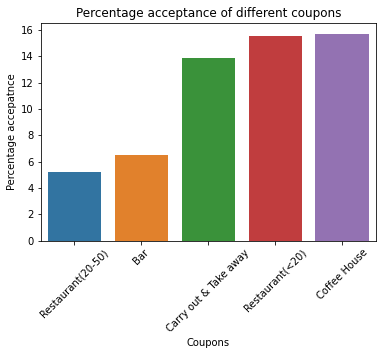

In [75]:
# Created a bar plot for the percentage accepted based on the time of the day
# Filtered to only acceptance data
# Sorted by percentage acceptance
bar = sns.barplot(data = new_df.query('Y == 1').sort_values("count"), x = "Group", y = "count")

# Add title to bar graph
plt.title('Percentage acceptance of different coupons')

# x-axis label
plt.xlabel('Coupons')

# y-axis label
plt.ylabel('Percentage accepatnce')

# Rotate x-axis labels
plt.xticks(rotation=45)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [76]:
# Analyzed the "coupon" column to see the data present in them by using value_counts function.
value_counts = data['coupon'].value_counts()
print(value_counts)

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64


In [77]:
# Created a new dataframe for bar coupons
bar_coupons = data.query('coupon == "Bar"').reset_index().drop('index', axis=1)

In [78]:
bar_coupons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null   

In [79]:
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Group
0,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,0,4~8,1~3,1,1,0,0,1,0,Bar
1,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,0,4~8,1~3,1,0,0,1,0,1,Bar
2,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,0,4~8,1~3,1,1,1,0,1,0,Bar
3,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,Bar
4,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,Bar


2. What proportion of bar coupons were accepted?


In [111]:
# Used value_counts method to get the counts and normalized the data to get percentages
value_counts = bar_coupons['Y'].value_counts(normalize=True) * 100

# Printed the percentage of observations who chose to accept coupon
percentage_of_bar_coupon_accepted = value_counts[1]
print(percentage_of_bar_coupon_accepted)

41.00148735746158


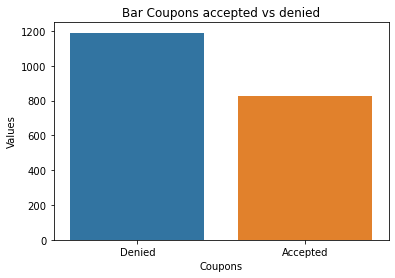

In [81]:
# Used Seaborn library to get bar plot for Bar Coupons accepted vs denied
bar = sns.barplot(data = bar_coupons.filter(['Y']).value_counts().reset_index(name='count'), x = "Y", y = "count")
# Add title to bar graph
plt.title('Bar Coupons accepted vs denied')

# x-axis label
plt.xlabel('Coupons')

# y-axis label
plt.ylabel('Values')

# Replace bar labels
bar.set_xticklabels(['Denied', 'Accepted'])

plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [82]:
# Analyzed the "Bar" column to see the data present in them by using value_counts function.
value_counts = bar_coupons['Bar'].value_counts()
print(value_counts)

never    830
less1    570
1~3      397
4~8      150
gt8       49
0         21
Name: Bar, dtype: int64


In [83]:
# Created a definition to categorize the "Bar" column
def categorize(category):
    if category in ['4~8', 'gt8']:
        return 'Group1'
    else:
        return 'Group2'
# Added the column to the table
bar_coupons['Group'] = bar_coupons['Bar'].apply(categorize)

#Calculated the percentages below by using value_count method
Greater_than_3_times = bar_coupons.query('Group=="Group1"')
# print(Greater_than_3_times)
value_counts = Greater_than_3_times["Y"].value_counts(normalize=True) * 100
# print(value_counts)
Greater_than_3_times = value_counts[1]
print("percent_acceptance_Greater_than_3_times:", Greater_than_3_times)

three_or_few_times = bar_coupons.query('Group=="Group2"')
value_counts = three_or_few_times["Y"].value_counts(normalize=True) * 100
# print(value_counts)
three_or_few_times = value_counts[1]
print("percent_acceptance_three_or_few_times:",three_or_few_times)

percent_acceptance_Greater_than_3_times: 76.88442211055276
percent_acceptance_three_or_few_times: 37.073707370737075


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [84]:
#Analyzed the data in the columns
value_counts = bar_coupons['Bar'].value_counts()
print(value_counts)

never    830
less1    570
1~3      397
4~8      150
gt8       49
0         21
Name: Bar, dtype: int64


In [85]:
#Analyzed the data in the columns
value_counts = bar_coupons['age'].value_counts()
print(value_counts)

21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: age, dtype: int64


In [86]:
# Created a definition to categorize based on the conditions given
def categorize(row):
    if (row['Bar'] in ['4~8', 'gt8', '1~3']) and row['age'] not in ['21','below21']:
        return "Group1"
    else:
        return "Group2"
    
# Added the column to the table
bar_coupons['Group'] = bar_coupons.apply(categorize, axis=1)

#Calculated the percentage acceptance for the 2 groups created below by using value_count method
bar_above_1_and_age_above_25 = bar_coupons.query('Group=="Group1"')
# print(bar_above_1_and_age_above_25)
value_counts = bar_above_1_and_age_above_25["Y"].value_counts(normalize=True) * 100
# print(value_counts)
bar_above_1_and_age_above_25 = value_counts[1]
print("percent_acceptance_bar_above_1_and_age_above_25:", bar_above_1_and_age_above_25)

bar_below_1_or_age_below_25 = bar_coupons.query('Group=="Group2"')
value_counts = bar_below_1_or_age_below_25["Y"].value_counts(normalize=True) * 100
#print(value_counts)
bar_below_1_or_age_below_25 = value_counts[1]
print("percent_acceptance_bar_below_1_or_age_below_25:",bar_below_1_or_age_below_25)


percent_acceptance_bar_above_1_and_age_above_25: 69.52380952380952
percent_acceptance_bar_below_1_or_age_below_25: 33.500313087038194


In [87]:
#Analyzed the data in the columns
value_counts = bar_coupons['passanger'].value_counts()
print(value_counts)

Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: passanger, dtype: int64


In [88]:
#Analyzed the data in the columns
value_counts = bar_coupons['occupation'].value_counts()
print(value_counts)

Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Personal Care & Service                       27
Architecture & Engineering                    27
Construction & Extraction                     24
Life Physical Social

In [89]:
# Created a definition to categorize based on the conditions given
def categorize(row):
    if (row['Bar'] in ['4~8', 'gt8', '1~3']) and row['passanger'] not in ['Kid(s)', 'Alone'] and row['occupation'] not in ['Farming Fishing & Forestry']:
        return "Group1"
    else:
        return "Group2"

# Added the column to the table
bar_coupons['Group'] = bar_coupons.apply(categorize, axis=1)

#Calculated the percentage acceptance for the 2 groups created below by using value_count method
Group_1 = bar_coupons.query('Group=="Group1"')
# print(bar_above_1_and_age_above_25)
value_counts = Group_1["Y"].value_counts(normalize=True) * 100
# print(value_counts)
Group_1 = value_counts[1]
print("percent_acceptance_bar_above_1_and_with_passanger_no_kids_and_no_farming:", Group_1)

Group_2 = bar_coupons.query('Group=="Group2"')
value_counts = Group_2["Y"].value_counts(normalize=True) * 100
# print(value_counts)
Group_2 = value_counts[1]
print("all_others:", Group_2)

percent_acceptance_bar_above_1_and_with_passanger_no_kids_and_no_farming: 71.7948717948718
all_others: 37.70581778265642


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [90]:
#Analyzed the data in the columns
value_counts = bar_coupons['maritalStatus'].value_counts()
print(value_counts)

Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: maritalStatus, dtype: int64


In [91]:
#Analyzed the data in the columns
value_counts = bar_coupons['RestaurantLessThan20'].value_counts()
print(value_counts)

1~3      878
4~8      568
less1    325
gt8      186
never     37
0         23
Name: RestaurantLessThan20, dtype: int64


In [92]:
#Analyzed the data in the columns
value_counts = bar_coupons['income'].value_counts()
print(value_counts)

$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: income, dtype: int64


In [93]:
# Created a definition to categorize based on the conditions given
def categorize(row):
    if (row['Bar'] in ['4~8', 'gt8', '1~3'] and row['passanger'] not in ['Kid(s)','Alone'] and row['maritalStatus'] not in ['Widowed']) or (row['Bar'] in ['4~8', 'gt8', '1~3'] and row['age'] in ['26','21','below21']) or (row['RestaurantLessThan20'] in ['4~8', 'gt8'] and row['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']):
        return "Group1"
    else:
        return "Group2"

# Added the column to the table
bar_coupons['Group'] = bar_coupons.apply(categorize, axis=1)

#Calculated the percentage acceptance for the 2 groups created below by using value_count method
Group_1 = bar_coupons.query('Group=="Group1"')
# print(bar_above_1_and_age_above_25)
value_counts = Group_1["Y"].value_counts(normalize=True) * 100
# print(value_counts)
Group_1 = value_counts[1]
print("Group_1:", Group_1)

Group_2 = bar_coupons.query('Group=="Group2"')
value_counts = Group_2["Y"].value_counts(normalize=True) * 100
# print(value_counts)
Group_2 = value_counts[1]
print("all_others:", Group_2)

Group_1: 56.92771084337349
all_others: 33.18551367331855


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

<!-- Got the results of the above analyzed data to be able to hypothesize -->
Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
percent_acceptance_Greater_than_3_times: 76.88442211055276
percent_acceptance_three_or_few_times: 37.073707370737075

Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?
percent_acceptance_bar_above_1_and_age_above_25: 69.52380952380952
percent_acceptance_bar_below_1_or_age_below_25: 33.500313087038194

Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 
percent_acceptance_bar_above_1_and_with_passanger_no_kids_and_no_farming: 71.7948717948718
all_others: 37.70581778265642

Compare the acceptance rates between those drivers who:
go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
go to bars more than once a month and are under the age of 30 OR
go to cheap restaurants more than 4 times a month and income is less than 50K.
Group_1: 56.92771084337349
all_others: 33.18551367331855



<!-- Below is the hypothesis about drivers who accepted bar coupons -->

The acceptance rate is higher for frequent bar visitors and it remained almost within the same range with a slight decrease even when age above 25 and passanger(no kids) and occupations other than farming is considered. And slightly decreased for the drivers with low income (less than 50K) but is still higher than others.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new DataFrame that contains just the coffee house coupons.

In [94]:
# Created a new dataframe to analyze the data of the drivers who accepted Coffee House coupons
coffee_coupons = data.query('coupon == "Coffee House"').reset_index().drop('index', axis=1)

In [95]:
# Analyzed the new dataframe
coffee_coupons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3996 non-null   object
 15  CoffeeHouse           3996 non-null   

In [96]:
coffee_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Group
0,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,4~8,1~3,1,0,0,0,1,0,Coffee House
1,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,4~8,1~3,1,1,0,0,1,0,Coffee House
2,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,4~8,1~3,1,1,0,0,1,0,Coffee House
3,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,0,4~8,1~3,1,1,0,0,1,1,Coffee House
4,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,0,4~8,1~3,1,0,0,0,1,0,Coffee House


2. What is the percentage of Coffee House coupons that were accepted?

In [97]:
# Used value_counts method to find the percentage acceptance of Coffee House Coupons
value_counts = coffee_coupons['Y'].value_counts(normalize=True) * 100

percentage_of_coffee_coupon_accepted = value_counts[1]

print(percentage_of_coffee_coupon_accepted)

49.92492492492492


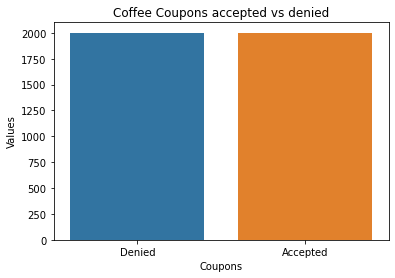

In [98]:
# Used Seaborn library to get bar plot for Coffee Coupon accepted vs denied
bar = sns.barplot(data = coffee_coupons.filter(['Y']).value_counts().reset_index(name='count'), x = "Y", y = "count")
# Add title to bar graph
plt.title('Coffee Coupons accepted vs denied')

# x-axis label
plt.xlabel('Coupons')

# y-axis label
plt.ylabel('Values')

# Replace bar labels
bar.set_xticklabels(['Denied', 'Accepted'])

plt.show()

In [99]:
value_counts = coffee_coupons['CoffeeHouse'].value_counts()
print(value_counts)

less1    1075
1~3      1042
never     927
4~8       538
gt8       342
0          72
Name: CoffeeHouse, dtype: int64


3. Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

In [100]:
# Created a definition to categorize based on the conditions given
def categorize(category):
    if category in ['4~8', 'gt8']:
        return 'Group1'
    else:
        return 'Group2'
    
# Added the column to the table
coffee_coupons['Group'] = coffee_coupons['CoffeeHouse'].apply(categorize)

#Calculated the percentage acceptance for the 2 groups created below by using value_count method
Greater_than_3_times = coffee_coupons.query('Group=="Group1"')
# print(Greater_than_3_times)
value_counts = Greater_than_3_times["Y"].value_counts(normalize=True) * 100
# print(value_counts)
Greater_than_3_times = value_counts[1]
print("percent_acceptance_Greater_than_3_times:", Greater_than_3_times)

three_or_few_times = coffee_coupons.query('Group=="Group2"')
value_counts = three_or_few_times["Y"].value_counts(normalize=True) * 100
# print(value_counts)
three_or_few_times = value_counts[1]
print("percent_acceptance_three_or_few_times:",three_or_few_times)

percent_acceptance_Greater_than_3_times: 67.5
percent_acceptance_three_or_few_times: 44.9614890885751


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

In [101]:
# Created a definition to categorize based on the conditions given
def categorize(row):
    if (row['CoffeeHouse'] in ['4~8', 'gt8', '1~3']) and row['age'] not in ['21','below21']:
        return "Group1"
    else:
        return "Group2"

# Added the column to the table
coffee_coupons['Group'] = coffee_coupons.apply(categorize, axis=1)

#Calculated the percentage acceptance for the 2 groups created below by using value_count method
coffee_above_1_and_age_above_25 = coffee_coupons.query('Group=="Group1"')
value_counts = coffee_above_1_and_age_above_25["Y"].value_counts(normalize=True) * 100
# print(value_counts)
coffee_above_1_and_age_above_25 = value_counts[1]
print("percent_acceptance_bar_above_1_and_age_above_25:", coffee_above_1_and_age_above_25)

coffee_below_1_or_age_below_25 = coffee_coupons.query('Group=="Group2"')
value_counts = coffee_below_1_or_age_below_25["Y"].value_counts(normalize=True) * 100
#print(value_counts)
coffee_below_1_or_age_below_25 = value_counts[1]
print("percent_acceptance_bar_below_1_or_age_below_25:",coffee_below_1_or_age_below_25)

percent_acceptance_bar_above_1_and_age_above_25: 63.84388807069219
percent_acceptance_bar_below_1_or_age_below_25: 42.75966641394996


5. Compare the acceptance rate between drivers who go to coffee house more than once a month and had passengers that were not a kid.

In [102]:
# Created a definition to categorize based on the conditions given
def categorize(row):
    if (row['CoffeeHouse'] in ['4~8', 'gt8', '1~3']) and row['passanger'] not in ['Kid(s)', 'Alone']:
        return "Group1"
    else:
        return "Group2"

# Added the column to the table
coffee_coupons['Group'] = coffee_coupons.apply(categorize, axis=1)

#Calculated the percentage acceptance for the 2 groups created below by using value_count method
Group_1 = coffee_coupons.query('Group=="Group1"')
# print(bar_above_1_and_age_above_25)
value_counts = Group_1["Y"].value_counts(normalize=True) * 100
# print(value_counts)
Group_1 = value_counts[1]
print("percent_acceptance_bar_above_1_and_with_passanger_no_kids:", Group_1)

Group_2 = coffee_coupons.query('Group=="Group2"')
value_counts = Group_2["Y"].value_counts(normalize=True) * 100
# print(value_counts)
Group_2 = value_counts[1]
print("all_others:", Group_2)

percent_acceptance_bar_above_1_and_with_passanger_no_kids: 76.65745856353591
all_others: 44.00977995110024


6. Compare the acceptance rate between drivers who go to coffee house more than once a month and weather is not sunny and temperature below 50 to all others.

In [103]:
#Analyzed the data in the columns
value_counts = coffee_coupons['weather'].value_counts()
print(value_counts)

Sunny    3467
Snowy     303
Rainy     226
Name: weather, dtype: int64


In [104]:
#Analyzed the data in the columns
value_counts = coffee_coupons['temperature'].value_counts()
print(value_counts)

80    2401
55    1277
30     318
Name: temperature, dtype: int64


In [105]:
# Created a definition to categorize based on the conditions given
def categorize(row):
    if (row['CoffeeHouse'] in ['4~8', 'gt8', '1~3']) and row['weather'] not in ['Sunny'] and row['temperature'] in [30]:
        return "Group1"
    else:
        return "Group2"

# Added the column to the table
coffee_coupons['Group'] = coffee_coupons.apply(categorize, axis=1)

#Calculated the percentage acceptance for the 2 groups created below by using value_count method
Group_1 = coffee_coupons.query('Group=="Group1"')
value_counts = Group_1["Y"].value_counts(normalize=True) * 100
# print(value_counts)
Group_1 = value_counts[1]
print("percent_acceptance_bar_above_1_and_weather_not_sunny_and_temperature_below_50:", Group_1)

Group_2 = coffee_coupons.query('Group=="Group2"')
value_counts = Group_2["Y"].value_counts(normalize=True) * 100
# print(value_counts)
Group_2 = value_counts[1]
print("percent_acceptance_bar_above_1_and_weather_sunny_or_temperature_equal_or_below_50:", Group_2)

percent_acceptance_bar_above_1_and_weather_not_sunny_and_temperature_below_50: 53.37837837837838
percent_acceptance_bar_above_1_and_weather_sunny_or_temperature_equal_or_below_50: 49.79209979209979


7. Find acceptance rate of drivers who go to coffee house more than once a month by time of day

In [106]:
#Analyzed the data in the columns
value_counts = coffee_coupons['time'].value_counts()
print(value_counts)

6PM     1093
7AM      913
10AM     899
2PM      794
10PM     297
Name: time, dtype: int64


In [107]:
# Created a definition to categorize based on the conditions given
def categorize(row):
    if (row['CoffeeHouse'] in ['4~8', 'gt8', '1~3']):
        return "Y"
    else:
        return "N"

# Added the column to the table
coffee_coupons['Coffee_Group'] = coffee_coupons.apply(categorize, axis=1)
coffee_coupons.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3996 non-null   object
 15  CoffeeHouse           3996 non-null   

In [108]:
# Created a new table for acceptance percentage based on time
coffee_time_df = coffee_coupons.query('Coffee_Group == "Y"').filter(['time', 'Y'], axis=1).value_counts(normalize=True).reset_index(name='count')
print(coffee_time_df)

   time  Y     count
0  10AM  1  0.176379
1   6PM  1  0.161811
2   2PM  1  0.150364
3   7AM  1  0.135276
4   6PM  0  0.113944
5   7AM  0  0.093652
6   2PM  0  0.054631
7  10AM  0  0.040583
8  10PM  0  0.036941
9  10PM  1  0.036420


In [109]:
# Created a new column based to sort based on time of day
def categorize(row):
    if (row['time'] in ['7AM']):
        return 0
    elif (row['time'] in ['10AM']):
        return 1
    elif (row['time'] in ['2PM']):
        return 2
    elif (row['time'] in ['6PM']):
        return 3
    else:
        return 4

coffee_time_df['Group'] = coffee_time_df.apply(categorize, axis=1)
print(coffee_time_df)

   time  Y     count  Group
0  10AM  1  0.176379      1
1   6PM  1  0.161811      3
2   2PM  1  0.150364      2
3   7AM  1  0.135276      0
4   6PM  0  0.113944      3
5   7AM  0  0.093652      0
6   2PM  0  0.054631      2
7  10AM  0  0.040583      1
8  10PM  0  0.036941      4
9  10PM  1  0.036420      4


Text(0, 0.5, 'Percentage acceptance')

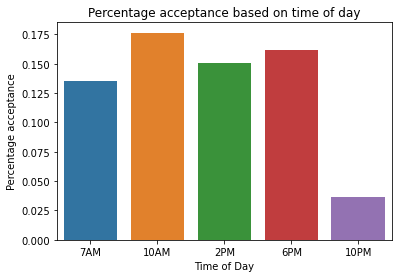

In [110]:
# Created a bar plot for the percentage accepted based on the time of the day
# Filtered to only acceptance data
# Sorted by percentage acceptance
bar = sns.barplot(data = coffee_time_df.query('Y == 1').sort_values("Group"), x = "time", y = "count")

# Add title to bar graph
plt.title('Percentage acceptance based on time of day')

# x-axis label
plt.xlabel('Time of Day')

# y-axis label
plt.ylabel('Percentage acceptance')


8.Based on these observations, what do you hypothesize about drivers who accepted the coffee house coupons?

The Percentage acceptance of coffee house coupons is about 50%. And it increases for the drivers
- Who go to coffee hose more often (more than 3 times a month)
- Age above 25
- Had an adult passanger
It doesn't look like weather had much affect on acceptance.
And the highest acceptance is at 10am.

# Next Steps

Since we've identified a few factors that affect the overall acceptance of coupons.
We can identify other factors that affect acceptance like 
- Different occupations
- Distance
- Education
- Number of children
We can further work on identifying the factors that affect the other coupons i.e.,
- Restaurant (<20)
- Restaurant (20-50)
- Carry Out & Take away